In [4]:

import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import tensorflow as tf
import matplotlib.pyplot as plt

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

## 데이터 읽어오기.
df = pd.read_csv("../dataset/house_price_of_unit_area.csv")
#print(df.info())
#print(df.head())

## data copy
dataset=df.copy()
tf.random.set_seed(777) ### random seed 고정해줘서 돌릴때마 랜덤값을 고정.
print("-------- dataset ---------")
print(type(dataset))
print(dataset.shape)


1 Physical GPUs, 1 Logical GPUs
-------- dataset ---------
<class 'pandas.core.frame.DataFrame'>
(414, 6)


In [5]:

## 데이터에서 label 데이터 추출
label_data=dataset.pop("house price of unit area") #pop으로 인해서 'house price of unit area' raw가 사라짐.
print(dataset.shape)
# 모델의 설계
input_Layer = tf.keras.layers.Input(shape=(5,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_Layer)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
x= tf.keras.layers.Dense(300, activation='sigmoid')(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()




(414, 5)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 301       
Total params: 36,001
Trainable params: 36,001
Non-trainable params: 0
_________________________________________________________________


In [6]:
## loss / 학습 최적화 방법 / 평가 방법 결정하기
loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.00004)
metrics=tf.keras.metrics.RootMeanSquaredError() ## regression이므로 평가 지표는 RootMeanSquaredError 된다.( MSE 사용해도 무방)

## 모델 동작하기 위해 compile
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

## 학습 돌리면서  결과를 histiry라는 변수에 저장하기
result=model.fit(dataset, label_data, epochs=2000, batch_size=100)
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())



Epoch 1/2000
5/5 [==============================] - 1s 2ms/step - loss: 1517.4784 - root_mean_squared_error: 38.9548
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 1432.7153 - root_mean_squared_error: 37.8512
Epoch 3/2000
5/5 [==============================] - 0s 3ms/step - loss: 1351.0181 - root_mean_squared_error: 36.7562
Epoch 4/2000
5/5 [==============================] - 0s 3ms/step - loss: 1274.9441 - root_mean_squared_error: 35.7064
Epoch 5/2000
5/5 [==============================] - 0s 3ms/step - loss: 1205.1206 - root_mean_squared_error: 34.7148
Epoch 6/2000
5/5 [==============================] - 0s 2ms/step - loss: 1139.0795 - root_mean_squared_error: 33.7503
Epoch 7/2000
5/5 [==============================] - 0s 2ms/step - loss: 1078.5081 - root_mean_squared_error: 32.8406
Epoch 8/2000
5/5 [==============================] - 0s 3ms/step - loss: 1020.7083 - root_mean_squared_error: 31.9485
Epoch 9/2000
5/5 [==============================] - 0s 2ms/step 

<class 'list'>
13/13 [==============================] - 0s 2ms/step - loss: 110.1065 - root_mean_squared_error: 10.4932
[110.1064682006836, 10.493162155151367]
13/13 [==============================] - 0s 2ms/step - loss: 110.1065 - root_mean_squared_error: 10.4932

 Test rmse: 10.4932


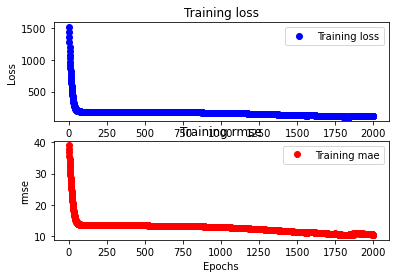

In [13]:
### history에서 loss key를 가지는 값들만 추출
#print(result.history)
loss = result.history['loss']
print(type(loss))
### loss 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 mean_absolute_error key를 가지는 값들만 추출
root_mse = result.history['root_mean_squared_error']
epochs = range(1, len(root_mse) + 1)
### mean_absolute_error 를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, root_mse, 'ro', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

## dataset -> model -> predict 값 - label_Data 의 값을 추출.
print(model.evaluate(dataset, label_data))
print("\n Test rmse: %.4f" % (model.evaluate(dataset, label_data)[1]))

plt.show()
